In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
from matplotlib import rcParams

from IPython.display import display
pd.options.display.max_columns = None
above = '../../../'
# val_file = above + 'assessment_og.pkl'
# valuation = pd.read_pickle(val_file)
df_file = above + 'post_eda.pkl'
data = pd.read_pickle(df_file)
data.drop(["s_total_units"], axis =1, inplace=True)
cols = data.columns.to_numpy()

In [19]:
data

,s_borough,s_zipcode,s_year_built,s_building_class_at_sale,s_sale_price,s_bbl,v_stories,v_fullval,v_nta,m_10yr_treasury_constant_maturity_rate,m_30yr_fixed_rate_mortgage_avg_in_us,m_case_shiller_ny_home_price_index,m_case_shiller_us_national_home_price_index,m_consumer_price_index,m_core_cpi,m_effective_fed_funds_rate,m_inflation_rate,m_population_level,m_real_gross_domestic_product,m_sp500_index,m_unemployment_rate,m_us_real_median_household_income,m_10yr_treasury_constant_maturity_rate_%chg,m_30yr_fixed_rate_mortgage_avg_in_us_%chg,m_case_shiller_ny_home_price_index_%chg,m_case_shiller_us_national_home_price_index_%chg,m_consumer_price_index_%chg,m_core_cpi_%chg,m_effective_fed_funds_rate_%chg,m_inflation_rate_%chg,m_population_level_%chg,m_real_gross_domestic_product_%chg,m_sp500_index_%chg,m_unemployment_rate_%chg,m_us_real_median_household_income_%chg,d_pop_25_years_and_over,d_less_than_9th_grade,d_less_than_9th_grade_pct,d_9th_to_12th_grade_no_diploma,d_9th_to_12th_grade_no_diploma_pct,d_high_school_graduate,d_high_school_graduate_pct,d_some_college_no_degree,d_some_college_no_degree_pct,d_associates_degree,d_associates_degree_pct,d_bachelors_degree,d_bachelors_degree_pct,d_graduate_or_professional_degree,d_graduate_or_professional_degree_pct,d_total_population,d_white_population,d_white_population_pct,d_black_or_african_american_population,d_black_or_african_american_population_pct,d_american_indian_and_alaska_native_population,d_american_indian_and_alaska_native_population_pct,d_asian_population,d_asian_population_pct,d_native_hawaiian_and_other_pacific_islander_population,d_native_hawaiian_and_other_pacific_islander_population_pct,d_some_other_race_population,d_some_other_race_population_pct,d_total_housing_units,d_no_bedroom_units,d_no_bedroom_units_pct,d_1_bedroom_units,d_1_bedroom_units_pct,d_2_bedroom_units,d_2_bedroom_units_pct,d_3_bedroom_units,d_3_bedroom_units_pct,d_4_bedroom_units,d_4_bedroom_units_pct,d_5_bedroom_units,d_5_bedroom_units_pct,d_owner_occupied_units,d_units_less_than_50000,d_units_less_than_50000_pct,d_units_from_50000_to_99999,d_units_from_50000_to_99999_pct,d_units_from_100000_to_149999,d_units_from_100000_to_149999_pct,d_units_from_150000_to_199999,d_units_from_150000_to_199999_pct,d_units_from_200000_to_299999,d_units_from_200000_to_299999_pct,d_units_from_300000_to_499999,d_units_from_300000_to_499999_pct,d_units_from_500000_to_999999,d_units_from_500000_to_999999_pct,d_units_1000000_or_more,d_units_1000000_or_more_pct,d_median_housing_price,d_total_households,d_households_less_than_10000,d_households_less_than_10000_pct,d_households_from_10000_to_14999,d_households_from_10000_to_14999_pct,d_households_from_15000_to_24999,d_households_from_15000_to_24999_pct,d_households_from_25000_to_34999,d_households_from_25000_to_34999_pct,d_households_from_35000_to_49999,d_households_from_35000_to_49999_pct,d_households_from_50000_to_74999,d_households_from_50000_to_74999_pct,d_households_from_75000_to_99999,d_households_from_75000_to_99999_pct,d_households_from_100000_to_149999,d_households_from_100000_to_149999_pct,d_households_from_150000_to_199999,d_households_from_150000_to_199999_pct,d_households_200000_or_more,d_households_200000_or_more_pct,d_median_household_income_dollars,d_mean_household_income_dollars,a_count,c_count,imputed_land_area
0,2,10458.0,1910.0,5.0,329000,2030390064,2.0,365000,45.0,3.391905,4.755,167.189630,141.525,221.187,222.803,0.168387,3.156842,311023.0,15712.754,1283.124286,9.1,57021.00,0.029070,0.008697,-0.006628,-0.003766,0.003243,0.002069,-0.080986,0.041710,0.000531,-0.000803,0.032955,-0.021505,-0.001289,861146,137783.360,0.160,126588.462,0.147,237676.296,0.276,145533.674,0.169,63724.804,0.074,95587.206,0.111,54252.198,0.063,1392002.0,342432.492,0.246,503904.724,0.362,13920.020,0.010,55680.08,0.04,2784.004,0.002,524784.754,0.377,512320,30739.200,0.060,169577.920,0.331,173164.16,0.338,112710.400,0.220,17418.88,0.034,9221.760,0.018,88816,8259.888,0.093,3197.376,0.036,6750.01

In [20]:
# Plot price vs average number of rooms
plt.scatter(data.s_total_units, data.s_sale_price)
plt.xlabel("Average number of units Sold")
plt.ylabel("Price")
plt.title("Relationship between s_total_units and s_sale_price")

AttributeError: 'DataFrame' object has no attribute 's_total_units'

Following this notebook: https://www.kaggle.com/shreayan98c/boston-house-price-prediction#SVM-Regressor

In [14]:
from numpy import loadtxt
import xgboost as xgb
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
# Import XGBoost Regressor
from xgboost import XGBRegressor

#load data
above = '../../../'
# val_file = above + 'assessment_og.pkl'
# valuation = pd.read_pickle(val_file)
df_file = above + 'post_eda.pkl'
data = pd.read_pickle(df_file)
data.drop(["s_total_units"], axis =1, inplace=True)
data = data[['a_count', 'c_count', 'd_3_bedroom_units_pct',
       'd_9th_to_12th_grade_no_diploma_pct',
       'd_households_200000_or_more',
       'd_households_from_35000_to_49999_pct', 'd_total_households',
       's_building_class_at_sale', 's_zipcode', 'v_fullval', 'v_stories',
       'd_1_bedroom_units', 'd_1_bedroom_units_pct', 'd_2_bedroom_units',
       'd_4_bedroom_units_pct', 'd_5_bedroom_units_pct',
       'd_american_indian_and_alaska_native_population',
       'd_american_indian_and_alaska_native_population_pct',
       'd_associates_degree_pct', 'd_bachelors_degree',
       'd_bachelors_degree_pct', 'd_graduate_or_professional_degree',
       'd_graduate_or_professional_degree_pct',
       'd_high_school_graduate_pct', 'd_households_200000_or_more_pct',
       'd_households_from_10000_to_14999',
       'd_households_from_150000_to_199999',
       'd_households_from_25000_to_34999_pct',
       'd_households_from_50000_to_74999_pct',
       'd_households_from_75000_to_99999_pct',
       'd_households_less_than_10000', 'd_mean_household_income_dollars',
       'd_median_household_income_dollars', 'd_median_housing_price',
       'd_no_bedroom_units', 'd_no_bedroom_units_pct',
       'd_some_college_no_degree_pct', 'd_total_housing_units',
       'd_units_1000000_or_more', 'd_units_1000000_or_more_pct',
       'd_units_from_100000_to_149999',
       'd_units_from_100000_to_149999_pct',
       'd_units_from_150000_to_199999',
       'd_units_from_150000_to_199999_pct',
       'd_units_from_200000_to_299999',
       'd_units_from_200000_to_299999_pct',
       'd_units_from_300000_to_499999',
       'd_units_from_300000_to_499999_pct', 'd_white_population',
       's_borough', 'd_5_bedroom_units',
       'd_9th_to_12th_grade_no_diploma_pct',
       'd_black_or_african_american_population',
       'd_households_from_100000_to_149999_pct',
       'd_households_from_150000_to_199999_pct',
       'd_households_from_25000_to_34999', 'd_less_than_9th_grade',
       'd_native_hawaiian_and_other_pacific_islander_population',
       'd_native_hawaiian_and_other_pacific_islander_population_pct',
       'd_units_from_50000_to_99999', 'd_units_less_than_50000_pct',
       'd_white_population_pct', 'imputed_land_area',
       'm_10yr_treasury_constant_maturity_rate',
       'm_10yr_treasury_constant_maturity_rate_%chg',
       'm_30yr_fixed_rate_mortgage_avg_in_us',
       'm_30yr_fixed_rate_mortgage_avg_in_us_%chg',
       'm_case_shiller_ny_home_price_index',
       'm_case_shiller_ny_home_price_index_%chg',
       'm_case_shiller_us_national_home_price_index',
       'm_case_shiller_us_national_home_price_index_%chg',
       'm_consumer_price_index', 'm_consumer_price_index_%chg',
       'm_core_cpi', 'm_core_cpi_%chg', 'm_effective_fed_funds_rate',
       'm_effective_fed_funds_rate_%chg', 'm_inflation_rate',
       'm_inflation_rate_%chg', 'm_population_level',
       'm_population_level_%chg', 'm_real_gross_domestic_product_%chg',
       'm_sp500_index', 'm_sp500_index_%chg', 'm_unemployment_rate',
       'm_unemployment_rate_%chg', 'm_us_real_median_household_income',
       'm_us_real_median_household_income_%chg', 's_year_built', 'v_nta', 's_sale_price']]

scaler = StandardScaler()
X = data.drop('s_sale_price', axis=1)
X = scaler.fit_transform(X)
y = data['s_sale_price']



In [ ]:
# split data into train and test sets
seed = 1000
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

#Create a XGBoost Regressor
reg = XGBRegressor()

# fit model no training data
#model = xgb.XGBRegressor()#objective ='reg:squarederror') #, colsample_bytree = 0.3, learning_rate = 0.1,
                #max_depth = 5, alpha = 10, n_estimators = 10)
reg.fit(X_train, y_train)
# Model prediction on train data
y_pred = reg.predict(X_train)

In [ ]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

In [ ]:
# Visualizing the differences between actual prices and predicted values
plt.figure(figsize=(12,9))
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [ ]:
#Predicting Test data with the model
y_test_pred = reg.predict(X_test)

In [ ]:
acc_xgb = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_xgb)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

In [ ]:
# Visualizing the differences between actual prices and predicted values
plt.figure(figsize=(12,9))
plt.scatter(y_test, y_test_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [ ]:
# Checking residuals
plt.figure(figsize=(12,9))
plt.scatter(y_pred,y_train-y_pred)
plt.title("Fitted vs Residuals")
plt.xlabel("Fitted Value")
plt.ylabel("Residuals")
plt.show()

# Group PCA
https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

In [22]:
data

,s_borough,s_zipcode,s_year_built,s_building_class_at_sale,s_sale_price,s_bbl,v_stories,v_fullval,v_nta,m_10yr_treasury_constant_maturity_rate,m_30yr_fixed_rate_mortgage_avg_in_us,m_case_shiller_ny_home_price_index,m_case_shiller_us_national_home_price_index,m_consumer_price_index,m_core_cpi,m_effective_fed_funds_rate,m_inflation_rate,m_population_level,m_real_gross_domestic_product,m_sp500_index,m_unemployment_rate,m_us_real_median_household_income,m_10yr_treasury_constant_maturity_rate_%chg,m_30yr_fixed_rate_mortgage_avg_in_us_%chg,m_case_shiller_ny_home_price_index_%chg,m_case_shiller_us_national_home_price_index_%chg,m_consumer_price_index_%chg,m_core_cpi_%chg,m_effective_fed_funds_rate_%chg,m_inflation_rate_%chg,m_population_level_%chg,m_real_gross_domestic_product_%chg,m_sp500_index_%chg,m_unemployment_rate_%chg,m_us_real_median_household_income_%chg,d_pop_25_years_and_over,d_less_than_9th_grade,d_less_than_9th_grade_pct,d_9th_to_12th_grade_no_diploma,d_9th_to_12th_grade_no_diploma_pct,d_high_school_graduate,d_high_school_graduate_pct,d_some_college_no_degree,d_some_college_no_degree_pct,d_associates_degree,d_associates_degree_pct,d_bachelors_degree,d_bachelors_degree_pct,d_graduate_or_professional_degree,d_graduate_or_professional_degree_pct,d_total_population,d_white_population,d_white_population_pct,d_black_or_african_american_population,d_black_or_african_american_population_pct,d_american_indian_and_alaska_native_population,d_american_indian_and_alaska_native_population_pct,d_asian_population,d_asian_population_pct,d_native_hawaiian_and_other_pacific_islander_population,d_native_hawaiian_and_other_pacific_islander_population_pct,d_some_other_race_population,d_some_other_race_population_pct,d_total_housing_units,d_no_bedroom_units,d_no_bedroom_units_pct,d_1_bedroom_units,d_1_bedroom_units_pct,d_2_bedroom_units,d_2_bedroom_units_pct,d_3_bedroom_units,d_3_bedroom_units_pct,d_4_bedroom_units,d_4_bedroom_units_pct,d_5_bedroom_units,d_5_bedroom_units_pct,d_owner_occupied_units,d_units_less_than_50000,d_units_less_than_50000_pct,d_units_from_50000_to_99999,d_units_from_50000_to_99999_pct,d_units_from_100000_to_149999,d_units_from_100000_to_149999_pct,d_units_from_150000_to_199999,d_units_from_150000_to_199999_pct,d_units_from_200000_to_299999,d_units_from_200000_to_299999_pct,d_units_from_300000_to_499999,d_units_from_300000_to_499999_pct,d_units_from_500000_to_999999,d_units_from_500000_to_999999_pct,d_units_1000000_or_more,d_units_1000000_or_more_pct,d_median_housing_price,d_total_households,d_households_less_than_10000,d_households_less_than_10000_pct,d_households_from_10000_to_14999,d_households_from_10000_to_14999_pct,d_households_from_15000_to_24999,d_households_from_15000_to_24999_pct,d_households_from_25000_to_34999,d_households_from_25000_to_34999_pct,d_households_from_35000_to_49999,d_households_from_35000_to_49999_pct,d_households_from_50000_to_74999,d_households_from_50000_to_74999_pct,d_households_from_75000_to_99999,d_households_from_75000_to_99999_pct,d_households_from_100000_to_149999,d_households_from_100000_to_149999_pct,d_households_from_150000_to_199999,d_households_from_150000_to_199999_pct,d_households_200000_or_more,d_households_200000_or_more_pct,d_median_household_income_dollars,d_mean_household_income_dollars,a_count,c_count,imputed_land_area
0,2,10458.0,1910.0,5.0,329000,2030390064,2.0,365000,45.0,3.391905,4.755,167.189630,141.525,221.187,222.803,0.168387,3.156842,311023.0,15712.754,1283.124286,9.1,57021.00,0.029070,0.008697,-0.006628,-0.003766,0.003243,0.002069,-0.080986,0.041710,0.000531,-0.000803,0.032955,-0.021505,-0.001289,861146,137783.360,0.160,126588.462,0.147,237676.296,0.276,145533.674,0.169,63724.804,0.074,95587.206,0.111,54252.198,0.063,1392002.0,342432.492,0.246,503904.724,0.362,13920.020,0.010,55680.08,0.04,2784.004,0.002,524784.754,0.377,512320,30739.200,0.060,169577.920,0.331,173164.16,0.338,112710.400,0.220,17418.88,0.034,9221.760,0.018,88816,8259.888,0.093,3197.376,0.036,6750.01

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = data.loc[:, data.columns != 's_sale_price']  #independent columns
y = data.loc[:, data.columns == 's_sale_price']    #target column sales price

# Filter for the macroeconomic columns 
X_m = data[[col for col in X if col.startswith('m')]]
sc_m = StandardScaler()

sc_m.fit(X_m)
scaled_X_m = sc_m.transform(X_m)
X_m_l = X_m.shape[1]

In [24]:
pca_m = PCA(n_components = X_m_l)
pca_m.fit(scaled_X_m)
x_m_pca = pca_m.transform(scaled_X_m)

In [59]:
X_m_l

26

In [61]:
np.array([0.40091176, 0.5097685 , 0.61315006, 0.67193252,
       0.72210327, 0.76766202, 0.80664871, 0.84413933, 0.87814196,
       0.90560663, 0.9282672 , 0.94933385, 0.9682595 , 0.98158514,
       0.99028495]).shape

(15,)

In [52]:
np.concatenate((np.array([0]),np.cumsum(pca_m.explained_variance_ratio_)), axis = 0) 

array([0.        , 0.40091176, 0.5097685 , 0.61315006, 0.67193252,
       0.72210327, 0.76766202, 0.80664871, 0.84413933, 0.87814196,
       0.90560663, 0.9282672 , 0.94933385, 0.9682595 , 0.98158514,
       0.99028495, 0.99417017, 0.99710152, 0.99830941, 0.9991831 ,
       0.99955181, 0.99972227, 0.99986241, 0.9999444 , 0.99998677,
       0.99999759, 1.        ])

[]

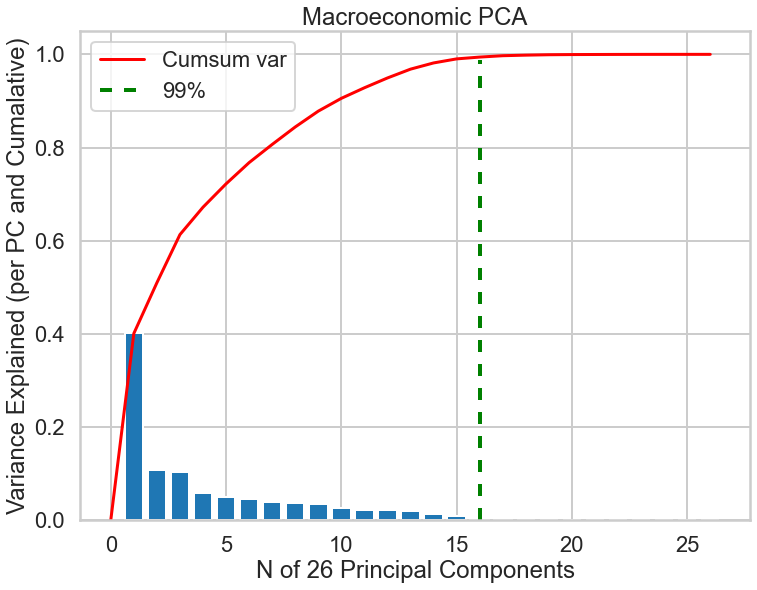

In [108]:
plt.figure(figsize=(12,9))
plt.bar(np.arange(1, X_m_l + 1),pca_m.explained_variance_ratio_[0:X_m_l])
cumsum = np.concatenate((np.array([0]),np.cumsum(pca_m.explained_variance_ratio_)), axis = 0) 
plt.plot(np.arange(0, X_m_l + 1),cumsum, color = 'r', label ='Cumsum var')
plt.axvline(x = 16, linewidth=4, color='g', dashes= (3, 3, 3, 3), ymin =0, ymax=0.94, label ='99%')
plt.ylabel("Variance Explained (per PC and Cumalative)")
plt.xlabel("N of 26 Principal Components")
plt.title("Macroeconomic PCA")
plt.legend()
plt.plot()

In [26]:
# Filter for the demographic columns 
X_d = data[[col for col in X if col.startswith('d')]]
sc_d = StandardScaler()
sc_d.fit(X_d)
scaled_X_d = sc_d.transform(X_d)
X_d_l = X_d.shape[1]

In [27]:
pca_d = PCA(n_components = X_d_l)
pca_d.fit(scaled_X_d)
x_d_pca = pca_d.transform(scaled_X_d)

[]

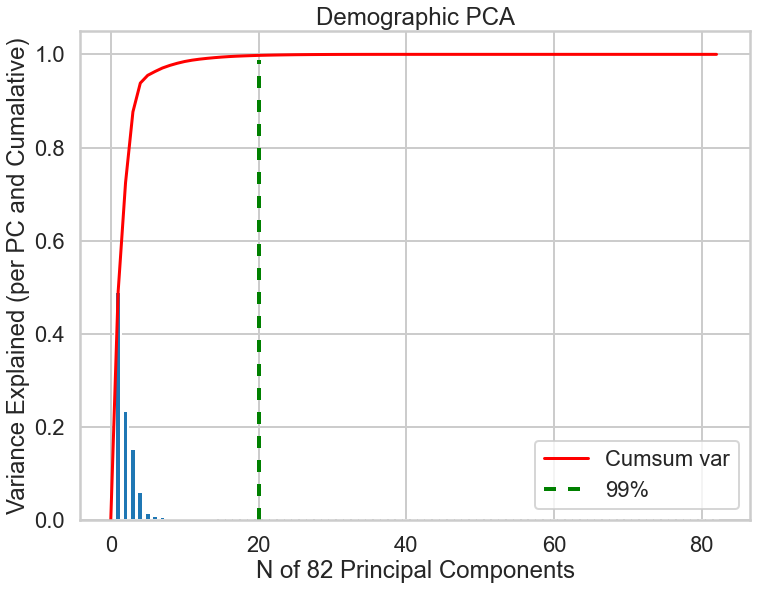

In [119]:
plt.figure(figsize=(12,9))
plt.bar(np.arange(1, X_d_l + 1),pca_d.explained_variance_ratio_[0:X_d_l])
cumsum = np.concatenate((np.array([0]),np.cumsum(pca_d.explained_variance_ratio_)), axis = 0) 
plt.plot(np.arange(0, X_d_l + 1),cumsum, color = 'r', label ='Cumsum var')
plt.axvline(x = 20, linewidth=4, color='g', dashes= (3, 3, 3, 3), ymin =0, ymax=0.94, label ='99%')
plt.ylabel("Variance Explained (per PC and Cumalative)")
plt.xlabel("N of 82 Principal Components")
plt.title("Demographic PCA")
plt.legend()
plt.plot()

In [ ]:
# Reconstruct from the 15 dimensional scores 
pca_m = PCA(n_components = 15)
scores_m = pca_m.fit_transform(scaled_X_m)

principalDf_m = pd.DataFrame(data = scores_m
             , columns = ['m_PC_' + str(i) for i in range(1, 16)])

In [ ]:
d_minus_m = data[[col for col in data if (col.startswith('s') | col.startswith('v') | col.startswith('d') | col.startswith('c') | col.startswith('a') | col.startswith('i'))]]

In [ ]:
d_PCm = pd.concat([d_minus_m, principalDf_m], axis = 1)
d_PCm.to_pickle(above + 'd_PCm.pkl')

In [ ]:
# Reconstruct from the 20 dimensional scores 
pca_d = PCA(n_components = 20)
scores_d = pca_d.fit_transform(scaled_X_d)

principalDf_d = pd.DataFrame(data = scores_d
             , columns = ['d_PC_' + str(i) for i in range(1, 21)])

In [ ]:
d_minus_d = data[[col for col in data if (col.startswith('s') | col.startswith('v') | col.startswith('m') | col.startswith('c') | col.startswith('a') | col.startswith('i'))]]

In [ ]:
d_PCd = pd.concat([d_minus_d, principalDf_d], axis = 1)
d_PCd.to_pickle(above + 'd_PCd.pkl')

In [ ]:
d_minus_md = data[[col for col in data if (col.startswith('s') | col.startswith('v') | col.startswith('c') | col.startswith('a') | col.startswith('i'))]]

In [ ]:
d_PCmd = pd.concat([d_minus_md, principalDf_m, principalDf_d], axis = 1)
d_PCmd.to_pickle(above + 'd_PCmd.pkl')

In [ ]:
d_PCmd

# Gradient Boosting Regressor Hyperparameter tuning

In [6]:
def trainTest(dat, pct):
    '''
    Randomly splits data into train and test
    '''
    dat_shuf = dat.reindex(np.random.permutation(dat.index))
    trn = dat_shuf[:int(np.floor(dat_shuf.shape[0]*pct))]
    tst = dat_shuf[int(np.floor(dat_shuf.shape[0]*pct)):]
    return [trn, tst]

In [7]:
mm, mm1 = trainTest(data, .10)

In [8]:
mm

,s_borough,s_zipcode,s_year_built,s_building_class_at_sale,s_sale_price,s_bbl,v_stories,v_fullval,v_nta,a_count,c_count,imputed_land_area,m_PC_1,m_PC_2,m_PC_3,m_PC_4,m_PC_5,m_PC_6,m_PC_7,m_PC_8,m_PC_9,m_PC_10,m_PC_11,m_PC_12,m_PC_13,m_PC_14,m_PC_15,d_PC_1,d_PC_2,d_PC_3,d_PC_4,d_PC_5,d_PC_6,d_PC_7,d_PC_8,d_PC_9,d_PC_10,d_PC_11,d_PC_12,d_PC_13,d_PC_14,d_PC_15,d_PC_16,d_PC_17,d_PC_18,d_PC_19,d_PC_20
9934,3,11230.0,1920.0,3.0,522000,3054280071,2.0,454000,134.0,9809,12619,2020.0,-3.826288,-0.298937,0.242233,0.078590,-0.320897,0.527618,-0.348181,1.138530,-1.112574,-1.028277,1.051734,-0.954258,0.892077,0.566345,-0.270984,-5.549686,-0.001220,2.735178,4.467809,-1.552839,1.105491,-0.941342,-0.254174,-0.172065,0.142022,-0.868887,-0.192235,0.501263,-0.488272,-0.011549,-0.145162,0.177860,0.024857,0.048440,-0.226813
70330,5,10309.0,1940.0,2.0,339900,5075630025,1.0,354000,172.0,987,1913,3742.0,0.374050,-2.644582,0.215939,-1.059939,-0.880007,0.291614,1.024843,-0.688764,1.131642,-0.259351,-0.358474,0.184350,-0.342996,-0.144924,-0.472030,11.712084,-0.956119,-1.017552,1.384372,0.037796,0.385821,-0.247294,-0.230955,0.202912,0.099634,0.646244,-0.349906,-0.922828,-0.402897,0.343772,0.151618,-0.256482,-0.269060,0.002213,-0.046875
66294,4,11432.0,1950.0,5.0,750000,4099560108,2.0,898000,108.0,5068,8307,4520.0,0.572149,-1.447490,-0.726748,-2.240819,-0.634040,-1.267535,-0.418790,-0.310810,-0.317779,-0.646092,-1.306202,0.016597,-0.692128,0.112905,-0.128188,-3.528772,-1.700065,-2.726794,-1.310939,1.039627,0.149343,0.333760,0.494305,0.091757,-0.432303,0.533103,0.027969,0.171161,-0.360051,0.145023,-0.143708,-0.006654,-0.030599,-0.220886,-0.202532
82623,4,11414.0,1930.0,2.0,280000,4142531537,1.0,264000,170.0,4681,8019,1600.0,3.284957,0.118702,-1.539678,-0.392634,-0.379870,-0.681299,0.252345,1.082608,1.197372,-1.073087,0.023713,0.598452,-0.930485,-0.305895,-0.635221,-3.356733,-1.219260,-3.261801,-1.126928,1.710850,0.625968,0.349587,0.254339,0.566529,0.167064,-0.269315,0.010261,0.385026,0.110448,-0.219426,-0.186912,-0.066175,-0.100105,0.039885,0.012215
10355,3,11234.0,1960.0,2.0,875000,3086200025,1.0,1256000,24.0,9638,11641,6608.0,-4.284235,0.773198,0.946220,-0.165551,-0.320423,-0.945193,2.528392,-0.995597,-2.042967,0.872377,0.160690,-0.608514,0.666401,-0.320118,-0.161491,-5.549686,-0.001220,2.735178,4.467809,-1.552839,1.105491,-0.941342,-0.254174,-0.172065,0.142022,-0.868887,-0.192235,0.501263,-0.488272,-0.011549,-0.145162,0.177860,0.024857,0.048440,-0.226813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50469,4,11363.0,1930.0,3.0,564888,4081200032,2.0,644000,146.0,5834,7536,2140.0,-0.397998,-0.979833,-1.548740,-2.403100,2.332315,-0.593805,-0.917180,-0.609295,-0.207345,0.901356,1.882589,0.693066,0.033324,0.431463,0.335993,-4.007456,-2.255514,-2.472329,-1.633921,0.567430,0.409667,0.175806,-0.390434,0.135550,-0.285213,-0.339453,0.132732,-0.099603,0.209167,-0.240167,-0.065752,-0.095008,-0.381140,0.069019,-0.021214
70856,5,10314.0,1975.0,0.0,499000,5015980048,2.0,413000,177.0,925,1766,2750.0,1.657927,-0.003337,-3.646201,0.732969,0.965662,-0.420926,0.466139,0.583563,-0.065171,-0.462657,-1.021706,1.134785,0.280329,-1.051657,-0.229468,11.712084,-0.956119,-1.017552,1.384372,0.037796,0.385821,-0.247294,-0.230955,0.202912,0.099634,0.646244,-0.349906,-0.922828,-0.402897,0.343772,0.151618,-0.256482,-0.269060,0.002213,-0.046875
53785,4,11357.0,1975.0,27.0,200000,4047321002,1.0,891891,30.0,5564,8245,3000.0,-0.335658,-1.656221,-0.497066,-0.750800,-0.124558,0.366278,-0.688760,-1.918317,0.621193,-0.261679,0.216346,-0.880755,-0.884931,0.190417,-0.249839,-4.007456,-2.255514,-2.472329,-1.633921,0.567430,0.409667,0.175806,-0.390434,0.135550,-0.285213,-0.339453,0.132732,-0.099603,0.209167,-0.240167,-0.065752,-0.095008,-0.381140,0.069019,-0.021214
102248,5,10306.0,1965.0,2.0,600000,5022700048,1.0,578000,2.0,742,1964,4000.0,5.893772,0.5856

In [9]:
#load data
above = '../../../'
# val_file = above + 'assessment_og.pkl'
# valuation = pd.read_pickle(val_file)
data = pd.read_pickle(above + 'd_PCmd.pkl')

sc_og = StandardScaler()
scaler = StandardScaler()
nonparam, param = trainTest(data, (data.shape[0] - 12500)/data.shape[0])

data.drop('s_bbl', axis = 1, inplace = True)
X = param.drop('s_sale_price', axis=1)
X = scaler.fit_transform(X)
y = param['s_sale_price']
X_nonparam = nonparam.drop('s_sale_price', axis=1)
X_nonparam = scaler.fit_transform(X_nonparam)
y_nonparam = nonparam['s_sale_price']

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor


In [ ]:

# Grid of hyperparameters to search over
param_grid_gr = {'learning_rate': [0.01,0.1, 0.2,0.3],
              'n_estimators' : [100, 200, 300],
              'subsample' : [0.8, 0.9, 1]}

# Regressor Instantiation
gr = GradientBoostingRegressor()

mse_grid = GridSearchCV(estimator = gr, 
                        param_grid = param_grid_gr, 
                        scoring = 'r2', 
                        cv = 4, 
                        verbose = 1)

mse_grid.fit(X,y)

print("Best parameter: ", mse_grid.best_params_)
print("Highest R^2: ", np.sqrt(np.abs(mse_grid.best_score_)))


In [12]:
gr = GradientBoostingRegressor(learning_rate = 0.2, n_estimators = 300, subsample = 1)


In [15]:
test_size = 0.33
acc = []
for i in range(2):
    X_train, X_test, y_train, y_test = train_test_split(X_nonparam, y_nonparam, test_size=test_size)    
    gr.fit(X_train,y_train)
    #Predicting Test data with the model
    y_test_pred = gr.predict(X_test)
    acc_xgb = metrics.r2_score(y_test, y_test_pred)
    acc.append(acc_xgb)

In [17]:
np.array(acc).mean()

0.7448471035811464